In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import random as rnd
import tensorflow as tf
import scipy.signal as sig 
import gym
import numpy.random as rnd

In [2]:
env = gym.make('FrozenLake-v0')
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


In [3]:
Q = np.zeros([env.observation_space.n,env.action_space.n])
rList = []

for epochs in range(10000):
    
    state = env.reset()
    done = False
    total_reward = 0
    j = 0
    
    while not done and j<99:
        j = j+1
        action = np.argmax(Q[state,:]+rnd.randn(1,env.action_space.n)*(1./(epochs+1)))
        state_next,reward,done,_ = env.step(action)
        Q[state,action] += 0.8*(reward + 0.95*np.max(Q[state_next,:]) - Q[state,action])
        total_reward += reward
        state = state_next
    
    rList.append(total_reward)
    if epochs%100==0:
        print('Epoch %d: Reward %f\n'%(epochs,total_reward))

Epoch 0: Reward 0.000000

Epoch 100: Reward 0.000000

Epoch 200: Reward 0.000000

Epoch 300: Reward 1.000000

Epoch 400: Reward 0.000000

Epoch 500: Reward 1.000000

Epoch 600: Reward 0.000000

Epoch 700: Reward 0.000000

Epoch 800: Reward 0.000000

Epoch 900: Reward 1.000000

Epoch 1000: Reward 1.000000

Epoch 1100: Reward 1.000000

Epoch 1200: Reward 1.000000

Epoch 1300: Reward 1.000000

Epoch 1400: Reward 0.000000

Epoch 1500: Reward 1.000000

Epoch 1600: Reward 1.000000

Epoch 1700: Reward 1.000000

Epoch 1800: Reward 1.000000

Epoch 1900: Reward 1.000000

Epoch 2000: Reward 1.000000

Epoch 2100: Reward 0.000000

Epoch 2200: Reward 0.000000

Epoch 2300: Reward 1.000000

Epoch 2400: Reward 1.000000

Epoch 2500: Reward 1.000000

Epoch 2600: Reward 1.000000

Epoch 2700: Reward 1.000000

Epoch 2800: Reward 1.000000

Epoch 2900: Reward 1.000000

Epoch 3000: Reward 1.000000

Epoch 3100: Reward 1.000000

Epoch 3200: Reward 1.000000

Epoch 3300: Reward 1.000000

Epoch 3400: Reward 0.00000

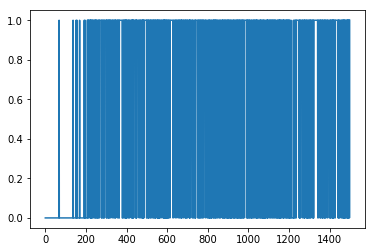

In [10]:
plt.plot(rList[0:1500])
plt.show()

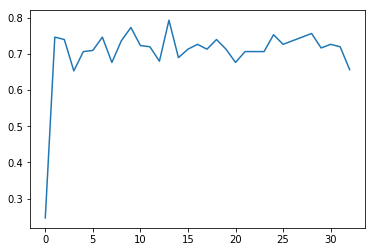

In [11]:
step = 300
rListNew = []

for k in range(step,len(rList),step):
    interv = rList[k-step:k]
    rListNew.append(np.sum(interv)/len(interv))

plt.plot(rListNew)
plt.show()

In [12]:
s = env.reset()
env.render()
d = False

while not d:
    a = np.argmax(Q[s,:])
    s,r,d,_=env.step(a)
    env.render()


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG


In [13]:
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


In [27]:
tf.reset_default_graph()

inputs1 = tf.placeholder(shape=[1,16],dtype=tf.float32)
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)

W = tf.Variable(tf.random_normal([16,4],0,0.01))
#b = tf.Variable(tf.random_normal([1,4],0,0.01))

#Qout = tf.add(tf.matmul(inputs1,W),b)
Qout = tf.matmul(inputs1,W)
pred = tf.argmax(Qout,axis=1)

loss = tf.reduce_sum(tf.square(nextQ-Qout))
opt = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss) 

In [29]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    jList = []
    rList = []
    
    num_epochs = 2000
    e = 0.1
    
    for epoch in range(num_epochs):
        s = env.reset()
        
        done = False
        rTotal = 0
        j = 0
        while j<99:
            j += 1
            
            in_vec0 = np.identity(16)[s:s+1]
            a,allQ = sess.run([pred,Qout],feed_dict={
                inputs1:in_vec0
            })
            if rnd.rand(1)<e:
                a[0] = env.action_space.sample()
            s1,reward,done,_=env.step(a[0])
            
            in_vec1 = np.identity(16)[s1:s1+1]
            Q1 = sess.run(Qout,feed_dict={
                inputs1:in_vec1
            }) 
            
            targetQ = allQ
            targetQ[0,a[0]] = reward + 0.99*np.max(Q1)
            
            _,W1 = sess.run([opt,W],feed_dict={
                inputs1:in_vec0,
                nextQ:targetQ
            })
            rTotal += reward 
            
            s = s1
            if done==True:
                e = 1./(10+epoch/50)
                break
                
        print('Iteration ' + str(epoch) + ': ' + str(rTotal))
        jList.append(j)
        rList.append(rTotal)
        
print("Percent of succesful episodes: " + str(sum(rList)/num_epochs) + "%")

Iteration 0: 0.0
Iteration 1: 0.0
Iteration 2: 1.0
Iteration 3: 0.0
Iteration 4: 0.0
Iteration 5: 0.0
Iteration 6: 0.0
Iteration 7: 0.0
Iteration 8: 0.0
Iteration 9: 0.0
Iteration 10: 0.0
Iteration 11: 0.0
Iteration 12: 0.0
Iteration 13: 0.0
Iteration 14: 0.0
Iteration 15: 0.0
Iteration 16: 0.0
Iteration 17: 0.0
Iteration 18: 0.0
Iteration 19: 0.0
Iteration 20: 0.0
Iteration 21: 0.0
Iteration 22: 0.0
Iteration 23: 0.0
Iteration 24: 1.0
Iteration 25: 0.0
Iteration 26: 0.0
Iteration 27: 0.0
Iteration 28: 0.0
Iteration 29: 0.0
Iteration 30: 0.0
Iteration 31: 0.0
Iteration 32: 0.0
Iteration 33: 0.0
Iteration 34: 0.0
Iteration 35: 0.0
Iteration 36: 0.0
Iteration 37: 0.0
Iteration 38: 0.0
Iteration 39: 0.0
Iteration 40: 0.0
Iteration 41: 0.0
Iteration 42: 1.0
Iteration 43: 0.0
Iteration 44: 0.0
Iteration 45: 0.0
Iteration 46: 0.0
Iteration 47: 0.0
Iteration 48: 0.0
Iteration 49: 0.0
Iteration 50: 0.0
Iteration 51: 0.0
Iteration 52: 0.0
Iteration 53: 0.0
Iteration 54: 0.0
Iteration 55: 0.0
It

Iteration 444: 0.0
Iteration 445: 0.0
Iteration 446: 0.0
Iteration 447: 1.0
Iteration 448: 0.0
Iteration 449: 1.0
Iteration 450: 1.0
Iteration 451: 0.0
Iteration 452: 1.0
Iteration 453: 0.0
Iteration 454: 0.0
Iteration 455: 0.0
Iteration 456: 0.0
Iteration 457: 0.0
Iteration 458: 1.0
Iteration 459: 0.0
Iteration 460: 1.0
Iteration 461: 0.0
Iteration 462: 0.0
Iteration 463: 1.0
Iteration 464: 0.0
Iteration 465: 1.0
Iteration 466: 0.0
Iteration 467: 0.0
Iteration 468: 1.0
Iteration 469: 0.0
Iteration 470: 0.0
Iteration 471: 0.0
Iteration 472: 0.0
Iteration 473: 0.0
Iteration 474: 0.0
Iteration 475: 0.0
Iteration 476: 0.0
Iteration 477: 0.0
Iteration 478: 0.0
Iteration 479: 0.0
Iteration 480: 1.0
Iteration 481: 1.0
Iteration 482: 1.0
Iteration 483: 1.0
Iteration 484: 0.0
Iteration 485: 0.0
Iteration 486: 0.0
Iteration 487: 0.0
Iteration 488: 0.0
Iteration 489: 0.0
Iteration 490: 0.0
Iteration 491: 0.0
Iteration 492: 0.0
Iteration 493: 0.0
Iteration 494: 0.0
Iteration 495: 0.0
Iteration 49

Iteration 879: 1.0
Iteration 880: 1.0
Iteration 881: 1.0
Iteration 882: 1.0
Iteration 883: 0.0
Iteration 884: 0.0
Iteration 885: 0.0
Iteration 886: 1.0
Iteration 887: 1.0
Iteration 888: 1.0
Iteration 889: 0.0
Iteration 890: 1.0
Iteration 891: 1.0
Iteration 892: 0.0
Iteration 893: 1.0
Iteration 894: 0.0
Iteration 895: 0.0
Iteration 896: 0.0
Iteration 897: 1.0
Iteration 898: 0.0
Iteration 899: 1.0
Iteration 900: 1.0
Iteration 901: 1.0
Iteration 902: 0.0
Iteration 903: 1.0
Iteration 904: 1.0
Iteration 905: 1.0
Iteration 906: 0.0
Iteration 907: 1.0
Iteration 908: 1.0
Iteration 909: 1.0
Iteration 910: 0.0
Iteration 911: 0.0
Iteration 912: 1.0
Iteration 913: 0.0
Iteration 914: 0.0
Iteration 915: 1.0
Iteration 916: 0.0
Iteration 917: 1.0
Iteration 918: 0.0
Iteration 919: 1.0
Iteration 920: 0.0
Iteration 921: 0.0
Iteration 922: 1.0
Iteration 923: 0.0
Iteration 924: 1.0
Iteration 925: 1.0
Iteration 926: 0.0
Iteration 927: 0.0
Iteration 928: 1.0
Iteration 929: 0.0
Iteration 930: 1.0
Iteration 93

Iteration 1300: 0.0
Iteration 1301: 0.0
Iteration 1302: 1.0
Iteration 1303: 0.0
Iteration 1304: 1.0
Iteration 1305: 0.0
Iteration 1306: 0.0
Iteration 1307: 1.0
Iteration 1308: 1.0
Iteration 1309: 0.0
Iteration 1310: 1.0
Iteration 1311: 1.0
Iteration 1312: 0.0
Iteration 1313: 1.0
Iteration 1314: 0.0
Iteration 1315: 1.0
Iteration 1316: 1.0
Iteration 1317: 0.0
Iteration 1318: 1.0
Iteration 1319: 1.0
Iteration 1320: 0.0
Iteration 1321: 0.0
Iteration 1322: 1.0
Iteration 1323: 1.0
Iteration 1324: 0.0
Iteration 1325: 0.0
Iteration 1326: 1.0
Iteration 1327: 0.0
Iteration 1328: 1.0
Iteration 1329: 1.0
Iteration 1330: 1.0
Iteration 1331: 1.0
Iteration 1332: 1.0
Iteration 1333: 1.0
Iteration 1334: 0.0
Iteration 1335: 1.0
Iteration 1336: 1.0
Iteration 1337: 1.0
Iteration 1338: 0.0
Iteration 1339: 1.0
Iteration 1340: 1.0
Iteration 1341: 1.0
Iteration 1342: 1.0
Iteration 1343: 1.0
Iteration 1344: 0.0
Iteration 1345: 0.0
Iteration 1346: 1.0
Iteration 1347: 0.0
Iteration 1348: 1.0
Iteration 1349: 0.0


Iteration 1711: 1.0
Iteration 1712: 1.0
Iteration 1713: 1.0
Iteration 1714: 0.0
Iteration 1715: 1.0
Iteration 1716: 1.0
Iteration 1717: 0.0
Iteration 1718: 1.0
Iteration 1719: 1.0
Iteration 1720: 1.0
Iteration 1721: 1.0
Iteration 1722: 0.0
Iteration 1723: 1.0
Iteration 1724: 1.0
Iteration 1725: 0.0
Iteration 1726: 1.0
Iteration 1727: 1.0
Iteration 1728: 1.0
Iteration 1729: 1.0
Iteration 1730: 0.0
Iteration 1731: 0.0
Iteration 1732: 1.0
Iteration 1733: 1.0
Iteration 1734: 1.0
Iteration 1735: 0.0
Iteration 1736: 1.0
Iteration 1737: 1.0
Iteration 1738: 1.0
Iteration 1739: 0.0
Iteration 1740: 0.0
Iteration 1741: 0.0
Iteration 1742: 0.0
Iteration 1743: 0.0
Iteration 1744: 1.0
Iteration 1745: 0.0
Iteration 1746: 1.0
Iteration 1747: 0.0
Iteration 1748: 1.0
Iteration 1749: 1.0
Iteration 1750: 0.0
Iteration 1751: 1.0
Iteration 1752: 1.0
Iteration 1753: 0.0
Iteration 1754: 0.0
Iteration 1755: 0.0
Iteration 1756: 1.0
Iteration 1757: 1.0
Iteration 1758: 1.0
Iteration 1759: 1.0
Iteration 1760: 1.0


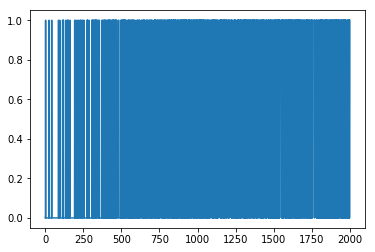

In [30]:
plt.plot(rList)

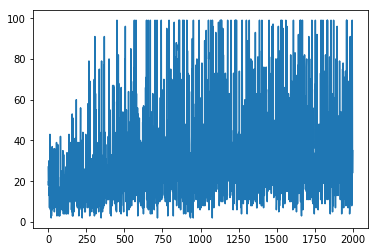

In [31]:
plt.plot(jList)